You are a product manager for a fitness studio based in Singapore and are interested in understanding the types of digital products you should offer. You plan to conduct a market analysis in Python to understand how to place your digital fitness products in the regional market. A market analysis will allow you to identify strengths of your competitors, gauge demand, and create unique new digital products and services for potential user

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', palette='Pastel2')
import os

def read_file(filepath, plot = True):
    """
    Read a CSV file from a given filepath, convert it into a pandas DataFrame,
    and return a processed DataFrame with three columns: 'week', 'region', and 'interest'. Generate a line plot using Seaborn to visualize the data. This corresponds to the first graphic (time series) returned by trends.google.com.
    """
    file = pd.read_csv(filepath, header=1)
    df = file.set_index('Week').stack().reset_index()
    df.columns = ['week','region','interest']
    df['week'] = pd.to_datetime(df['week'])
    plt.figure(figsize=(8,3))
    df = df[df['interest']!="<1"]
    df['interest'] = df['interest'].astype(float)

    if plot:
        sns.lineplot(data = df, x= 'week', y= 'interest',hue='region')
    return df

def read_geo(filepath, multi=False):
    """
    Read a CSV file from a given filepath, convert it into a pandas DataFrame,
    and return a processed DataFrame with two columns: 'country' and 'interest'. Generate a bar plot using Seaborn to visualize the data. This corresponds to the second graphic returned by trends.google.com. Use multi=False if only one keyword is being analyzed, and multi=True if more than one keyword is being analyzed.
    """
    file = pd.read_csv(filepath, header=1)

    if not multi:
        file.columns = ['country', 'interest']
        plt.figure(figsize=(8,4))
        sns.barplot(data = file.dropna().iloc[:25,:], y = 'country', x='interest')

    if multi:
        plt.figure(figsize=(3,8))
        file = file.set_index('Country').stack().reset_index()
        file.columns = ['country','category','interest']
        file['interest'] = pd.to_numeric(file['interest'].apply(lambda x: x[:-1]))
        sns.barplot(data=file.dropna(), y = 'country', x='interest', hue='category')

    file = file.sort_values(ascending=False,by='interest')
    return file

,week,region,interest
0,2018-03-18,workout: (Worldwide),59.0
1,2018-03-25,workout: (Worldwide),58.0
2,2018-04-01,workout: (Worldwide),61.0
3,2018-04-08,workout: (Worldwide),57.0
4,2018-04-15,workout: (Worldwide),59.0


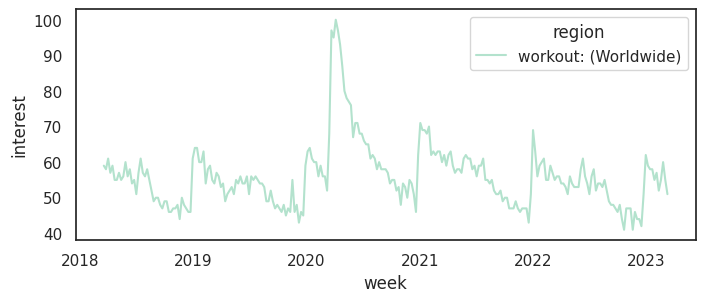

In [2]:
#loading the workout dataset
path = '/workout.csv'
workout = read_file(path)
workout.head()

In [4]:
#month with the most demand
from datetime import datetime
workout_by_month = workout.set_index('week').resample('MS').mean()
month_high = workout_by_month.sort_values(by = 'interest',ascending = False).iloc[0:1,:].index
month_high = month_high.date
month_high = month_high[0]
month_high
month_str = month_high.strftime('%Y-%m-%d')
print(f'The month with the most demand was {month_str}')

The month with the most demand was 2020-04-01


<ipython-input-4-6637839aea72>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  workout_by_month = workout.set_index('week').resample('MS').mean()


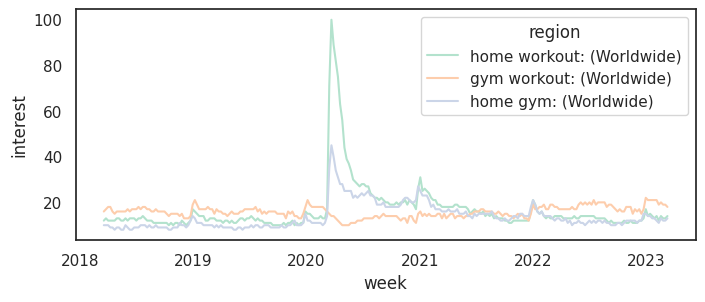

In [5]:
#loading the keyword dataset
key_path = '/three_keywords.csv'
keywords = read_file(key_path)


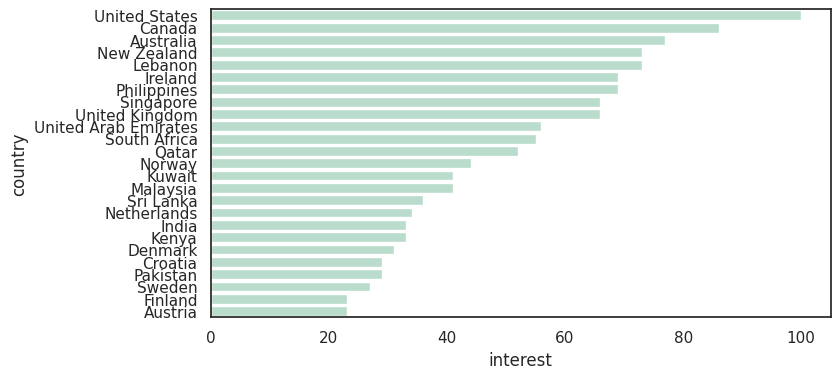

In [7]:
#loading the regions dataset
reg_path = '/workout_global.csv'
regions = read_geo(reg_path)

In [9]:
#country most interested in workouts
top = regions.sort_values(by = 'interest', ascending = False).reset_index()
top_country = top['country'][0]
print(f'The Country most interested in workout is {top_country}')

The Country most interested in workout is United States


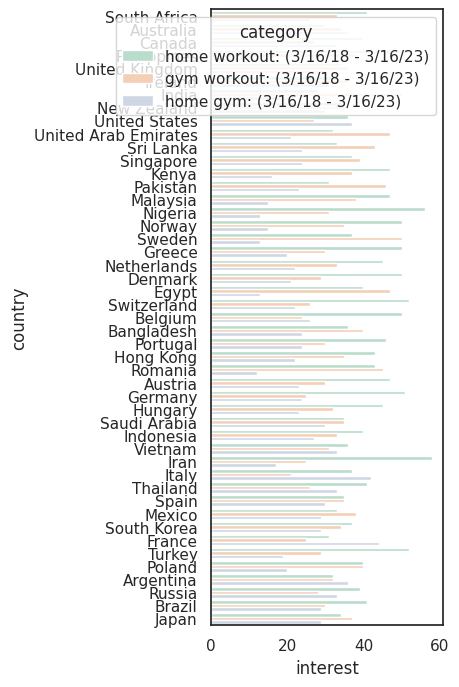

In [11]:
#loading categories by region
geo_path = '/geo_three_keywords.csv'
geo_categories = read_geo(geo_path, multi = True)

In [15]:
#filtering for middle east and south asia countries
mid_asia = ['Philippines','Singapore','United Arab Emirates','Qatar','Kuwait','Lebanon','Malaysia','Sri Lanka','India','Pakistan']

MESA = geo_categories[geo_categories['country'].isin(mid_asia)]

#grouping the filtered countries by interest
MESA2 = MESA.groupby(['category','country'])['interest'].sum()
MESA2 = MESA2.loc["home workout: (3/16/18 - 3/16/23)"].sort_values(ascending=False)
#extracting the top home workout country from the subset
top_home_workout_country = MESA2.index[0]
print(f'The top home workout country from the middle east and south asia is {top_home_workout_country}')


The top home workout country from the middle east and south asia is Philippines
